<a href="https://colab.research.google.com/github/syt1298/Data-extraction-from-patents/blob/main/Data_Fetching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Fetching from PTAB

In [ ]:
import os
import requests
import datetime
import time

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Add the folder shared  as shortuct on your Drive
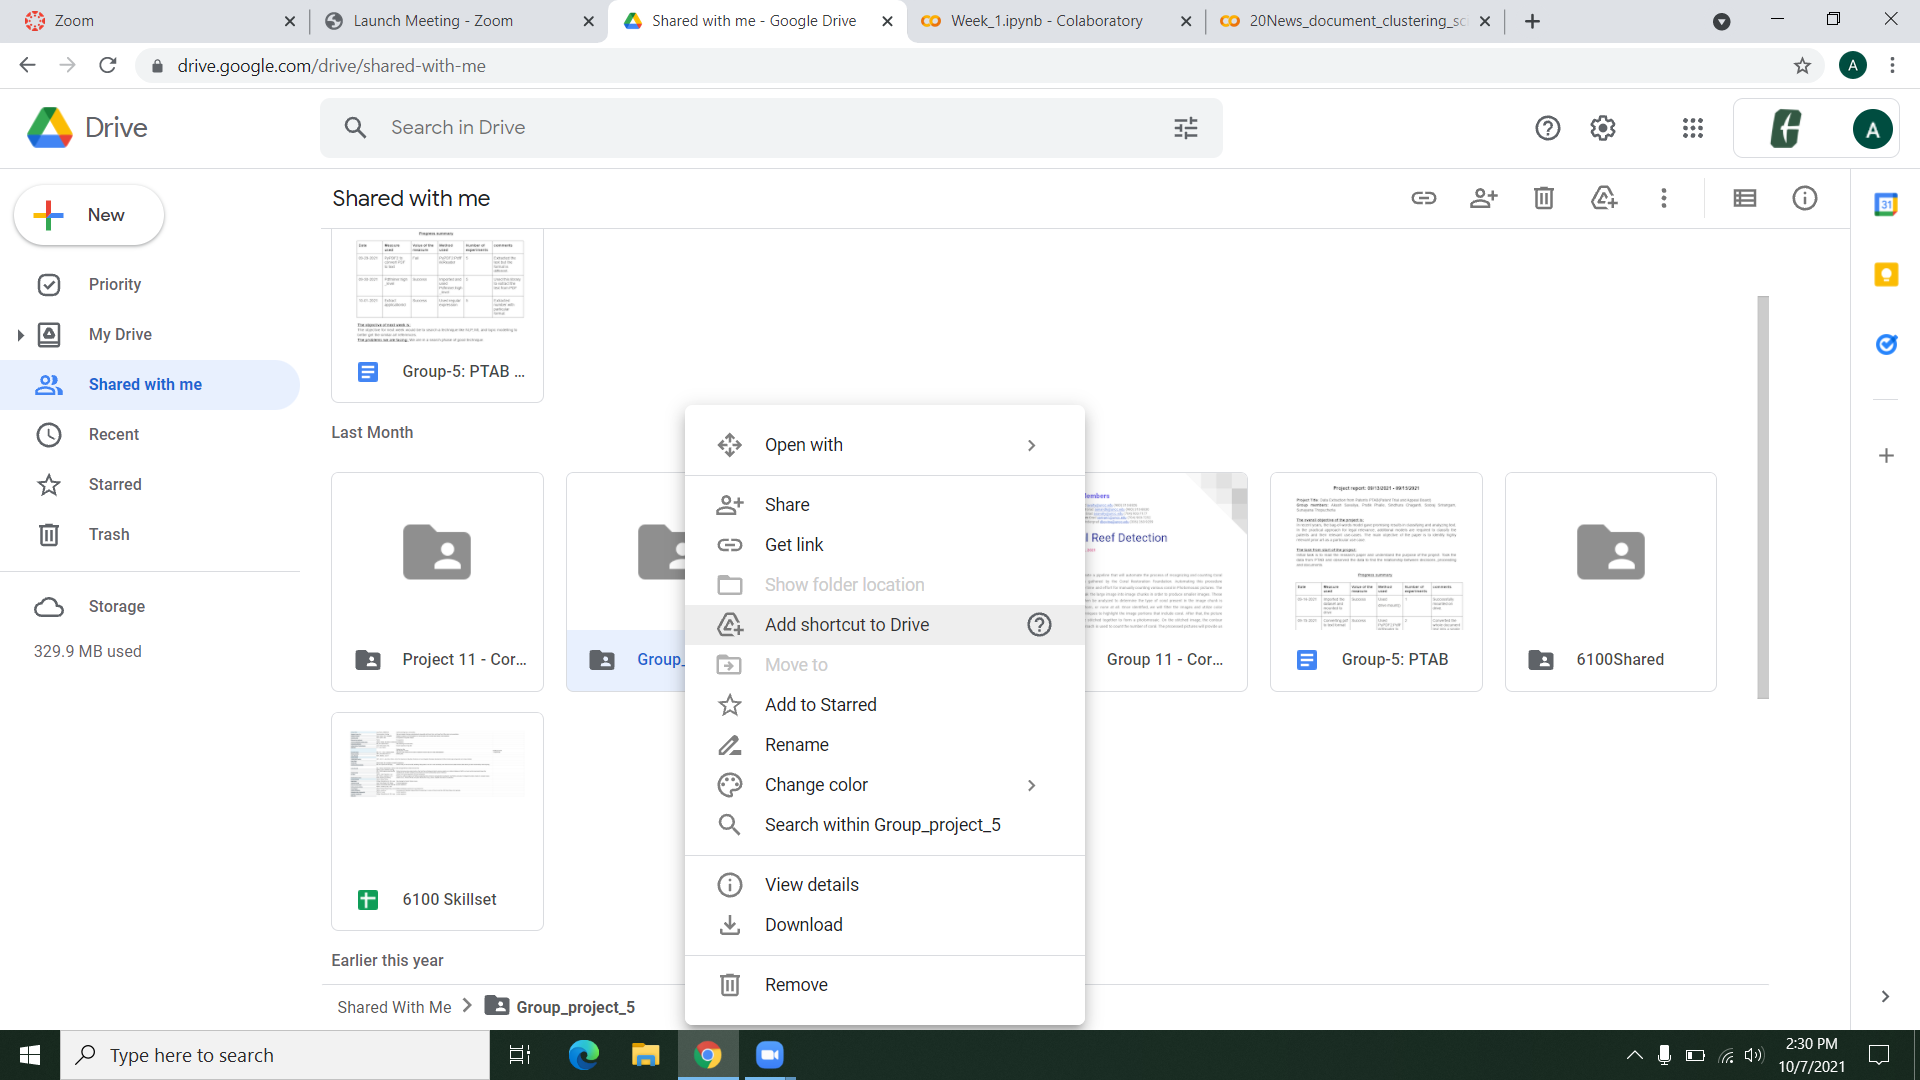

In [ ]:
%cd /content/drive/MyDrive/Project\ Data/DATA\ 2016-17/PDFs/
#%ls

/content/drive/MyDrive/Project Data/DATA 2016-17/PDFs


In [ ]:
%pwd

'/content/drive/MyDrive/Project Data/DATA 2016-17/PDFs'

Testing the API and trying to download single PDF

In [ ]:
r = requests.get('https://developer.uspto.gov/ptab-api/decisions?decisionFromDate=1776-07-04&decisionToDate=2021-09-29&recordTotalQuantity=500')

14196664

In [ ]:
r.json()

In [ ]:
data = r.json()

In [ ]:
doc_id = data["results"][499]['documentIdentifier']
doc_name = data["results"][499]['documentName']

In [ ]:

down = requests.get('https://developer.uspto.gov/ptab-api/documents/'+doc_id+'/download')

In [ ]:
with open('/content/drive/MyDrive/Project Data/'+doc_name,'wb') as f:
    f.write(down.content)

Dealing with the date time formats

In [ ]:
x = datetime.datetime(2021,9,25)
y = datetime.datetime(1997,7,2)
print(x.strftime("%Y-%m-%d"))
dif = datetime.timedelta(days=1)
x = x - y
print(x)

2021-09-25
8851 days, 0:00:00


In [ ]:
days = (datetime.datetime(2015, 12, 31) - datetime.datetime(2014, 1, 1)).days

In [ ]:
days

729

##Data downloading

In [ ]:
"""
Here we are fetching the data in day on day basis by going each day back in time
"""

cur_date = datetime.datetime(2016, 9, 19) # 
dif = datetime.timedelta(days=1)
days = (datetime.datetime(2017, 12, 31) - datetime.datetime(2014, 1, 1)).days + 1
total = 0
doc_names = set()
for day in range(days):
    r = requests.get('https://developer.uspto.gov/ptab-api/decisions?decisionDate=' + cur_date.strftime("%Y-%m-%d") +'&recordTotalQuantity=500')
    data = r.json()
    date_total = 0
    date_doc_names = set()
    for doc_i in range(len(data["results"])):
        doc_id = data["results"][doc_i]['documentIdentifier']
        doc_name = data["results"][doc_i]['documentName']
        if cur_date.strftime("%Y-%m-%d") + '_' + doc_name in date_doc_names:
            continue
        down = requests.get('https://developer.uspto.gov/ptab-api/documents/'+doc_id+'/download')
        with open('/content/drive/MyDrive/Project Data/DATA 2016-17/PDFs/' + cur_date.strftime("%Y-%m-%d") + '_' + doc_name,'wb') as f:
            f.write(down.content)
        doc_names.add(cur_date.strftime("%Y-%m-%d") + '_' + doc_name)
        date_doc_names.add(cur_date.strftime("%Y-%m-%d") + '_' + doc_name)
        #time.sleep(3)
    print(cur_date.strftime("%Y-%m-%d") + " -> Current Date documents : " + str(len(date_doc_names)) + ", Total Documents Till date : "+ str(len(doc_names)))
    cur_date = cur_date + dif

2016-09-19 -> Current Date documents : 94, Total Documents Till date : 94
2016-09-20 -> Current Date documents : 79, Total Documents Till date : 173
2016-09-21 -> Current Date documents : 107, Total Documents Till date : 280
2016-09-22 -> Current Date documents : 93, Total Documents Till date : 373
2016-09-23 -> Current Date documents : 69, Total Documents Till date : 442
2016-09-24 -> Current Date documents : 0, Total Documents Till date : 442
2016-09-25 -> Current Date documents : 0, Total Documents Till date : 442
2016-09-26 -> Current Date documents : 152, Total Documents Till date : 594
2016-09-27 -> Current Date documents : 100, Total Documents Till date : 694
2016-09-28 -> Current Date documents : 170, Total Documents Till date : 864
2016-09-29 -> Current Date documents : 162, Total Documents Till date : 1026
2016-09-30 -> Current Date documents : 133, Total Documents Till date : 1159
2016-10-01 -> Current Date documents : 0, Total Documents Till date : 1159
2016-10-02 -> Curren

2015-12-31 -> Current Date documents : 42, Total Documents Till date : 22981

Installing the pdfminer.six library to convert pdf to txt

In [ ]:
!pip install pdfminer.six

     |████████████████████████████████| 5.6 MB 5.9 MB/s 
     |████████████████████████████████| 3.5 MB 47.5 MB/s 


In [ ]:
import pdfminer.high_level as pdf
import regex as re
import pandas as pd

In [ ]:
Text = pdf.extract_text("2019-09-25_2019005330_Mail_Decision.pdf")
print(Text[:500])

Testing regex to fetch Application Number from the text

In [ ]:
x = re.search("[0-9]{2}\/[0-9]{3},[0-9]{3}",Text)

In [ ]:
x.captures()[:5]

Storing the Application number with corresponding document name into a data frame(tabular format)

In [ ]:
files = pd.DataFrame(columns=["Doc Name","Application Number"])
for file_path in os.listdir():
    Text = pdf.extract_text(file_path)
    try:
        app_no = str(re.search("[0-9]{2}\/[0-9]{3},[0-9]{3}",Text).captures()[0]).strip()
    except:
        app_no = ""
    files = files.append({"Doc Name" :file_path,"Application Number":app_no},ignore_index=True)

In [ ]:
display(files)

,Doc Name,Application Number
0,2019-09-25_2019005330_Mail_Decision.pdf,"15/019,105"
1,2019-09-25_2019002397_Mail_Decision.pdf,"14/732,905"
2,2019-09-25_2018001631_Mail_Decision.pdf,"13/994,248"
3,2019-09-25_2017011046_Mail_rehearing_decision.pdf,"13/731,942"
4,2019-09-25_2018005852_Mail_Decision.pdf,"14/076,456"
...,...,...
135,2019-09-23_2019001696_Mail_Decision.pdf,"13/960,653"
136,2019-09-23_2018006131_Mail_Decision.pdf,"13/678,819"
137,2019-09-23_2018009189_Mail_Decision.pdf,"14/580,668"
138,2019-09-23_2019000438_Mail_Decision.pdf,"14/812,668"
